# 01. Analysis Seoul CCTV

## 1. 데이터 읽기 

In [1]:
import pandas as pd 

In [2]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
pop_Seoul = pd.read_csv("../data/01. Seoul_Population.csv", encoding="utf-8")
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,"4,220,082","10,124,579","4,957,857","5,166,722","9,857,426","4,830,206","5,027,220","267,153","127,651","139,502",2.34,"1,365,126"
3,2017,종로구,"73,594","164,257","80,094","84,163","154,770","75,967","78,803","9,487","4,127","5,360",2.1,"26,182"
4,2017,중구,"60,412","134,593","66,337","68,256","125,709","62,253","63,456","8,884","4,084","4,800",2.08,"21,384"


In [7]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [8]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초 
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈 
- 단일 프로세스에서는 최대 효율 
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨 
- 누군가 스테로이드를 맞은 엑셀로 표현함

### Series 
- index와 value로 이루어져 있습니다 
- 한 가지 데이터 타입만 가질 수 있습니다

In [9]:
import pandas as pd 
import numpy as np 

- pandas는 통상 pd 
- numpy는 통상 np 

In [10]:
pd.Series()

Series([], dtype: object)

In [11]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [12]:
# pd.Series([1, 2, 3, 4], dtype=float64)

In [13]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [14]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [15]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [16]:
pd.Series({"Key": "Value"})

Key    Value
dtype: object

In [17]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [18]:
# 짝수를 찾고 싶다 
# data % 2 

In [19]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [20]:
data % 2 

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜 데이터 

In [21]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame 
- pd.Series() 
    - index, value 
- pd.DataFrame() 
    - index, value, column 

In [22]:
# 표준정규분포에서 샘플링한 난수 생성 
data = np.random.randn(6, 4)
data

array([[ 0.9408267 , -0.48717231,  1.01479503, -1.6259032 ],
       [ 0.30525424, -0.25593182, -0.96715161,  1.71142589],
       [-0.08006696,  1.55846386, -0.05224648,  0.05455309],
       [ 0.16907989, -0.85189379,  0.61209241, -2.43410062],
       [ 0.39550743, -1.10542968, -0.17383904,  1.15377131],
       [-0.38111736, -0.36139965, -0.14792469, -0.23606066]])

In [23]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"]) 
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


### 데이터 프레임 정보 탐색

- df.head() 

In [24]:
df.head()

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771


- df.tail()

In [25]:
df.tail()

,A,B,C,D
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


- df.index 

In [26]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [28]:
df.values

array([[ 0.9408267 , -0.48717231,  1.01479503, -1.6259032 ],
       [ 0.30525424, -0.25593182, -0.96715161,  1.71142589],
       [-0.08006696,  1.55846386, -0.05224648,  0.05455309],
       [ 0.16907989, -0.85189379,  0.61209241, -2.43410062],
       [ 0.39550743, -1.10542968, -0.17383904,  1.15377131],
       [-0.38111736, -0.36139965, -0.14792469, -0.23606066]])

- df.info() : 데이터 프레임의 기본 정보 확인

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [30]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.224914,-0.250561,0.047621,-0.229386
std,0.449776,0.941623,0.690083,1.585659
min,-0.381117,-1.105430,-0.967152,-2.434101
25%,-0.017780,-0.760713,-0.167360,-1.278443
50%,0.237167,-0.424286,-0.100086,-0.090754
75%,0.372944,-0.282299,0.446008,0.878967
max,0.940827,1.558464,1.014795,1.711426


### 데이터 정렬
- sort_values() 
- 특정 컬럼(열)을 기준으로 데이터를 정렬합니다

In [31]:
df 

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [32]:
df.sort_values(by="B", ascending=False, inplace=True)

In [33]:
df

,A,B,C,D
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771


### 데이터 선택

In [34]:
df 

,A,B,C,D
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771


In [35]:
# 한 개 컬럼 선택 
df["A"]

2021-01-03   -0.080067
2021-01-02    0.305254
2021-01-06   -0.381117
2021-01-01    0.940827
2021-01-04    0.169080
2021-01-05    0.395507
Name: A, dtype: float64

In [36]:
type(df["A"])

pandas.core.series.Series

In [37]:
df.A

2021-01-03   -0.080067
2021-01-02    0.305254
2021-01-06   -0.381117
2021-01-01    0.940827
2021-01-04    0.169080
2021-01-05    0.395507
Name: A, dtype: float64

In [38]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"]) 
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [39]:
df.D

2021-01-01   -1.625903
2021-01-02    1.711426
2021-01-03    0.054553
2021-01-04   -2.434101
2021-01-05    1.153771
2021-01-06   -0.236061
Freq: D, Name: D, dtype: float64

In [40]:
# 두 개 이상 컬럼 선택 
df[["A", "B"]]

,A,B
2021-01-01,0.940827,-0.487172
2021-01-02,0.305254,-0.255932
2021-01-03,-0.080067,1.558464
2021-01-04,0.169080,-0.851894
2021-01-05,0.395507,-1.105430
2021-01-06,-0.381117,-0.361400


### offset index
- [n:m] : n부터 m-1 까지 
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함합니다

In [41]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [42]:
df[0:3]

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553


In [43]:
df["20210101":"20210104"]

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101


- loc : location
- index 이름으로 특정 행, 열을 선택합니다

In [44]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [45]:
df.loc[:, ["A", "B"]]

,A,B
2021-01-01,0.940827,-0.487172
2021-01-02,0.305254,-0.255932
2021-01-03,-0.080067,1.558464
2021-01-04,0.169080,-0.851894
2021-01-05,0.395507,-1.105430
2021-01-06,-0.381117,-0.361400


In [46]:
df.loc["20210102":"20210104", ["A", "D"]]

,A,D
2021-01-02,0.305254,1.711426
2021-01-03,-0.080067,0.054553
2021-01-04,0.169080,-2.434101


In [47]:
df.loc["20210102":"20210104", "A":"D"]

,A,B,C,D
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101


In [48]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [49]:
df.loc["20210102", ["A", "B"]]

A    0.305254
B   -0.255932
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : inter location 
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [50]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [51]:
df.iloc[3]

A    0.169080
B   -0.851894
C    0.612092
D   -2.434101
Name: 2021-01-04 00:00:00, dtype: float64

In [52]:
df.iloc[3, 2]

0.6120924086916831

In [53]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,0.169080,-0.851894
2021-01-05,0.395507,-1.105430


In [54]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [55]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-02,0.305254,-0.967152
2021-01-03,-0.080067,-0.052246
2021-01-05,0.395507,-0.173839


In [56]:
df.iloc[:, 1:3]

,B,C
2021-01-01,-0.487172,1.014795
2021-01-02,-0.255932,-0.967152
2021-01-03,1.558464,-0.052246
2021-01-04,-0.851894,0.612092
2021-01-05,-1.105430,-0.173839
2021-01-06,-0.361400,-0.147925


### condition

In [57]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [58]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택 

df["A"] > 0 

2021-01-01     True
2021-01-02     True
2021-01-03    False
2021-01-04     True
2021-01-05     True
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [59]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [60]:
df[df["A"] > 0]

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771


In [61]:
df[df > 0]

,A,B,C,D
2021-01-01,0.940827,NaN,1.014795,NaN
2021-01-02,0.305254,NaN,NaN,1.711426
2021-01-03,NaN,1.558464,NaN,0.054553
2021-01-04,0.169080,NaN,0.612092,NaN
2021-01-05,0.395507,NaN,NaN,1.153771
2021-01-06,NaN,NaN,NaN,NaN


- NaN : Not a Number

### 컬럼 추가
- 기존 컬럼이 없으면 추가 
- 기존 컬럼이 있으면 수정

In [62]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [63]:
df["E"] = ["one", "one", "two", "tree", "four", "seven"]
df

,A,B,C,D,E
2021-01-01,0.940827,-0.487172,1.014795,-1.625903,one
2021-01-02,0.305254,-0.255932,-0.967152,1.711426,one
2021-01-03,-0.080067,1.558464,-0.052246,0.054553,two
2021-01-04,0.169080,-0.851894,0.612092,-2.434101,tree
2021-01-05,0.395507,-1.105430,-0.173839,1.153771,four
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061,seven


- isin()
- 특정 요소가 있는지 확인

In [64]:
df["E"].isin(["two"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [65]:
df["E"].isin(["two", "five"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [66]:
df["E"].isin(["two", "five", "three"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [67]:
df[df["E"].isin(["two", "five", "three"])]

,A,B,C,D,E
2021-01-03,-0.080067,1.558464,-0.052246,0.054553,two


### 특정 컬럼 제거
- del 
- drop

In [68]:
df

,A,B,C,D,E
2021-01-01,0.940827,-0.487172,1.014795,-1.625903,one
2021-01-02,0.305254,-0.255932,-0.967152,1.711426,one
2021-01-03,-0.080067,1.558464,-0.052246,0.054553,two
2021-01-04,0.169080,-0.851894,0.612092,-2.434101,tree
2021-01-05,0.395507,-1.105430,-0.173839,1.153771,four
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061,seven


In [69]:
del df["E"]
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [70]:
df.drop(["D"], axis=1) # axis=0 가로, axis=1 세로 

,A,B,C
2021-01-01,0.940827,-0.487172,1.014795
2021-01-02,0.305254,-0.255932,-0.967152
2021-01-03,-0.080067,1.558464,-0.052246
2021-01-04,0.169080,-0.851894,0.612092
2021-01-05,0.395507,-1.105430,-0.173839
2021-01-06,-0.381117,-0.361400,-0.147925


In [71]:
df.drop(["20210104"])

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


### apply() 

In [72]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [73]:
df["A"].apply("sum")

1.3494839450550336

In [74]:
df["A"].apply("mean")

0.2249139908425056

In [75]:
df["A"].apply("min"), df["A"].apply("max")

(-0.38111735952183845, 0.9408267041310049)

In [76]:
df[["A", "D"]].apply("sum")

A    1.349484
D   -1.376314
dtype: float64

In [77]:
df["A"].apply(np.sum)

2021-01-01    0.940827
2021-01-02    0.305254
2021-01-03   -0.080067
2021-01-04    0.169080
2021-01-05    0.395507
2021-01-06   -0.381117
Freq: D, Name: A, dtype: float64

In [78]:
df["A"].apply(np.mean)

2021-01-01    0.940827
2021-01-02    0.305254
2021-01-03   -0.080067
2021-01-04    0.169080
2021-01-05    0.395507
2021-01-06   -0.381117
Freq: D, Name: A, dtype: float64

In [79]:
df["A"].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [80]:
df.apply(np.sum)

A    1.349484
B   -1.503363
C    0.285726
D   -1.376314
dtype: float64

In [81]:
df

,A,B,C,D
2021-01-01,0.940827,-0.487172,1.014795,-1.625903
2021-01-02,0.305254,-0.255932,-0.967152,1.711426
2021-01-03,-0.080067,1.558464,-0.052246,0.054553
2021-01-04,0.169080,-0.851894,0.612092,-2.434101
2021-01-05,0.395507,-1.105430,-0.173839,1.153771
2021-01-06,-0.381117,-0.361400,-0.147925,-0.236061


In [82]:
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [83]:
df["A"].apply(plusminus)

2021-01-01     plus
2021-01-02     plus
2021-01-03    minus
2021-01-04     plus
2021-01-05     plus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [84]:
df["A"].apply(lambda num: "plus" if num > 0 else "minus")

2021-01-01     plus
2021-01-02     plus
2021-01-03    minus
2021-01-04     plus
2021-01-05     plus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [85]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [86]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [87]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [88]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [89]:
# 기존 컬럼이 없으면 추가, 있으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기

In [90]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [91]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [92]:
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [93]:
pop_Seoul["구별"].unique() 

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [94]:
len(pop_Seoul["구별"].unique())

25

In [95]:
# 외국인비율, 고령자비율 

pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [96]:
pop_Seoul.sort_values(["인구수"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [97]:
pop_Seoul.sort_values(["외국인"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [98]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [99]:
pop_Seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [100]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


---

#### Pandas에서 데이터 프레임을 병합하는 방법 
- pd.concat() 
- pd.merge() 
- pd.join() 

pd.merge(left, right) 

In [101]:
# 딕셔너리 안의 리스트 형태 

left = pd.DataFrame({
    "key": ["K0", "K4", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1","B2", "B3"]
})
left 

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [102]:
# 리스트 안의 딕셔너리 형태 

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"},
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법 
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다 
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 합니다

In [103]:
pd.merge(left, right, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [104]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [105]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [106]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [107]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [108]:
pd.merge(left, right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

## 4. 두 데이터 합치기

In [109]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [110]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [111]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제 
- del 
- drop() 

In [112]:
del data_result["2013년도 이전"]

In [113]:
del data_result["2014년"]

In [114]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [115]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)

In [116]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경 
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [117]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수 
- corr() 
- correlation 의 약자입니다 
- 상관계수가 0.2 이상인 데이터를 비교

In [118]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [119]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [120]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] 
data_result["CCTV비율"] = data_result["CCTV비율"] * 100 

In [121]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [122]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [123]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotlib 기초

In [124]:
import matplotlib.pyplot as plt 
from matplotlib import rc 

rc("font", family="Malgun Gothic") # Windows : Malgun Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

matplotlib 그래프 기본 형태 


```
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show
```

c:\Users\USER\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


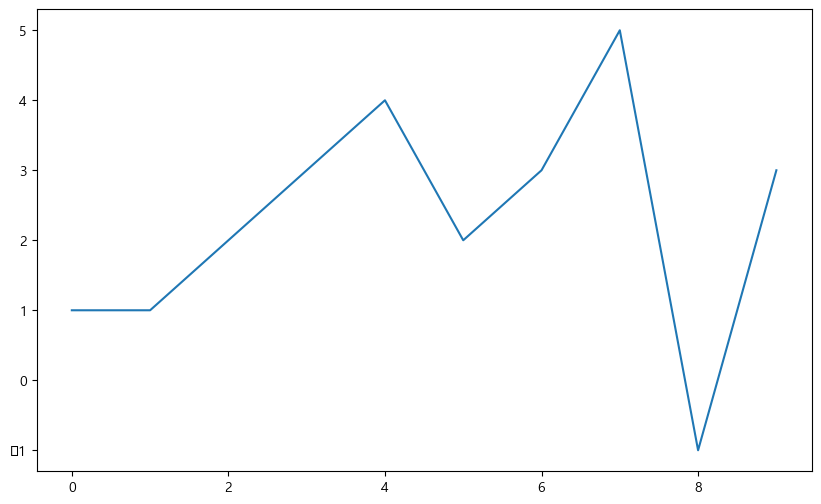

In [125]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1: 그래프 기초 

#### 삼각함수 그리기
- np.arange(a, b, s): a부터 b까지 s의 간격 
- np.sin(value)

In [126]:
import numpy as np 

t = np.arange(0, 12, 0.01)
y = np.sin(t)

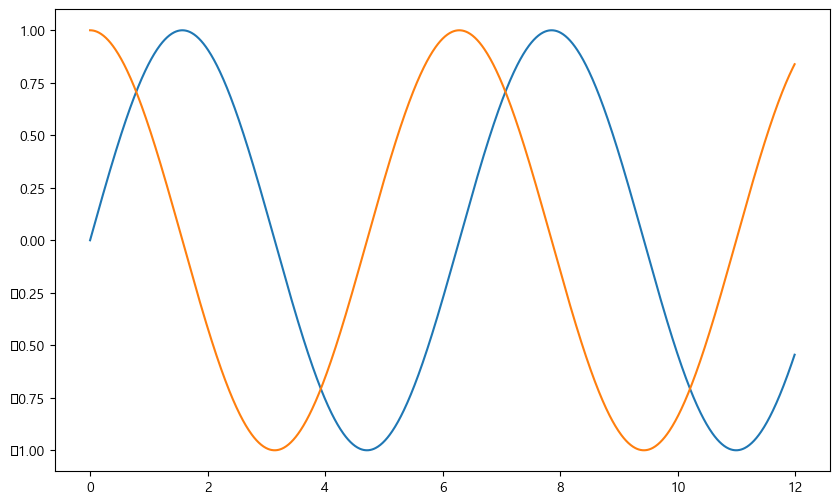

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가 
- 2. 그래프 제목 추가 
- 3. x축, y축 제목 추가 
- 4. 주황색, 파란색 선 데이터 의미 구분

In [128]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc=2) # 범례 
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") # 진폭 
    plt.show()

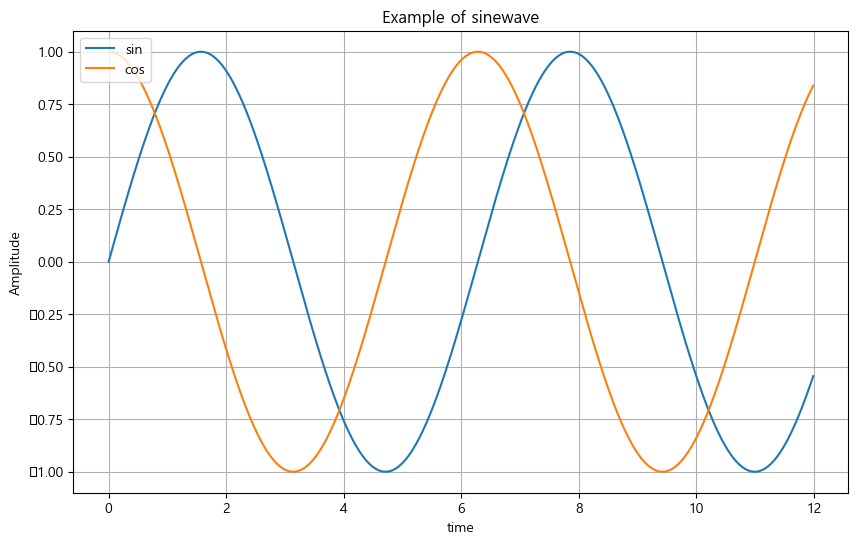

In [129]:
drawGraph()

### 예제2: 그래프 커스텀

In [130]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

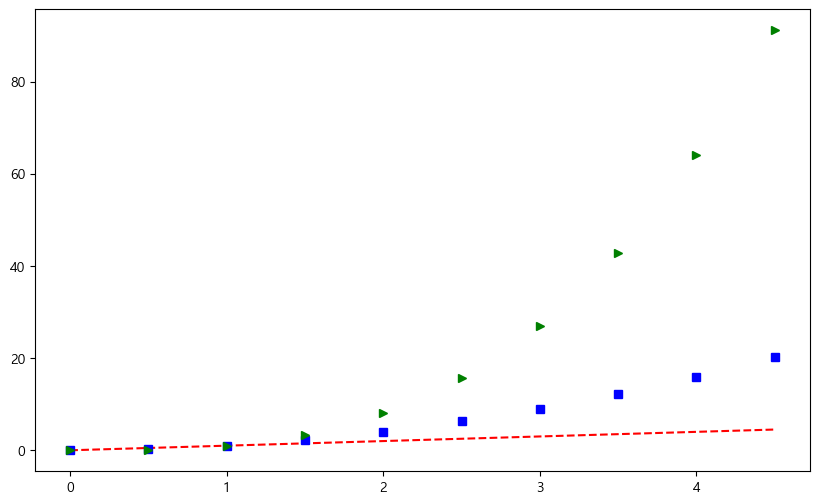

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--") # red ---- 
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g>")
plt.show()

In [132]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

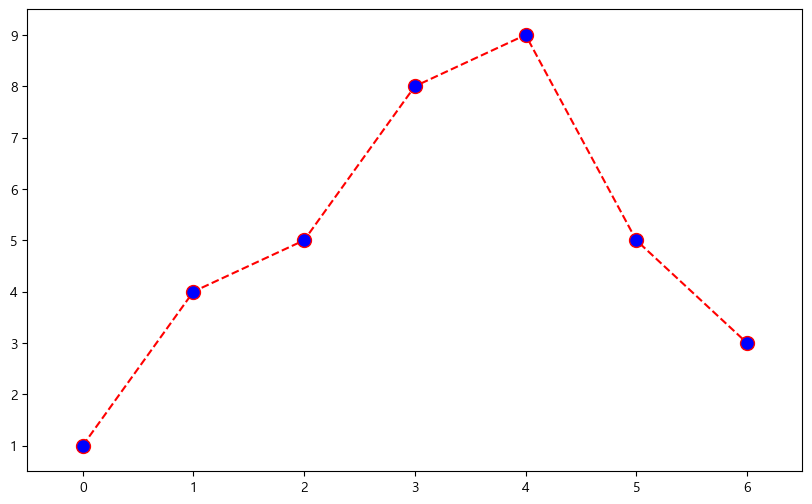

In [133]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="red", 
        linestyle="--", 
        marker="o", 
        markerfacecolor="blue",
        markersize=10, 
    )

    plt.xlim([-0.5, 6.5]) 
    plt.ylim([0.5, 9.5])
    plt.show() 
    
drawGraph()

### 예제3: scatter plot

In [134]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

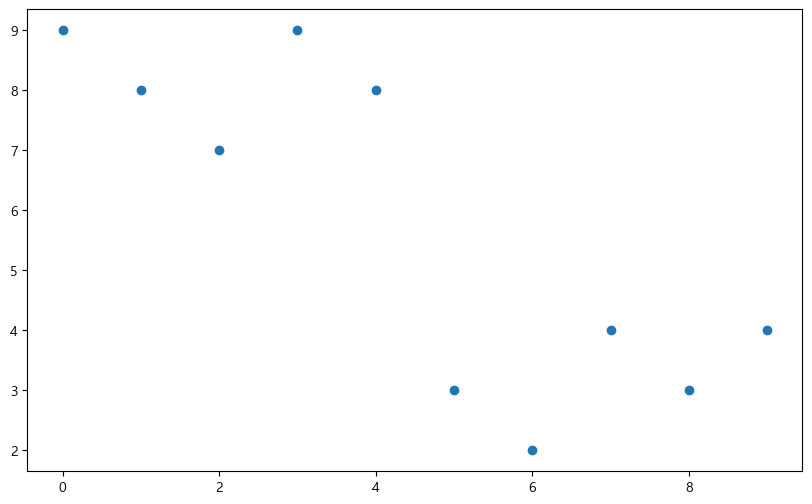

In [135]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()
    
drawGraph()

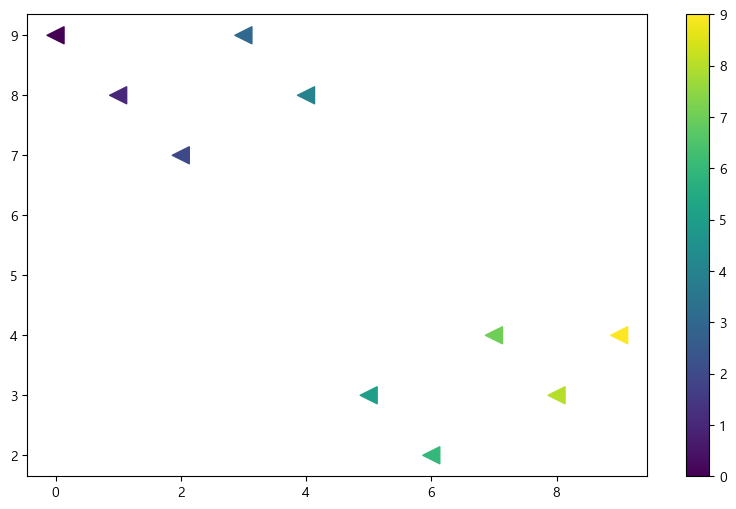

In [136]:
colormap = t 

def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=150, c=colormap, marker="<")
    plt.colorbar()
    plt.show()
    
drawGraph()

### 예제4: Pandas에서 plot 그리기 
- matplotlib 을 가져와서 사용합니다

In [137]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


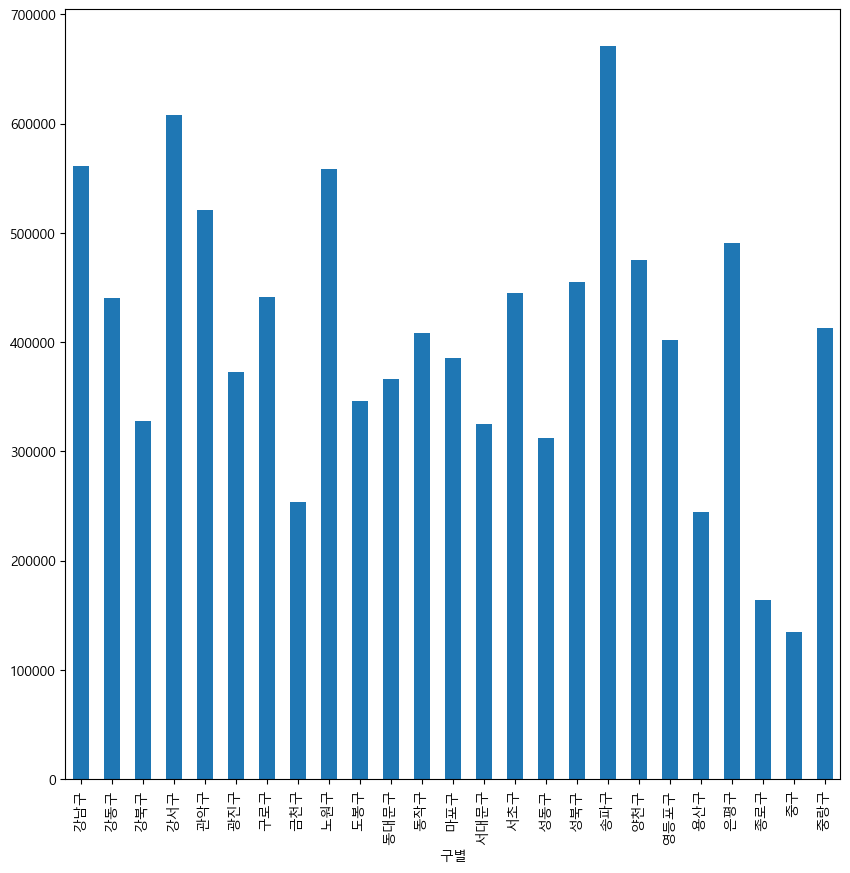

In [138]:
data_result["인구수"].plot(kind="bar", figsize=(10, 10));

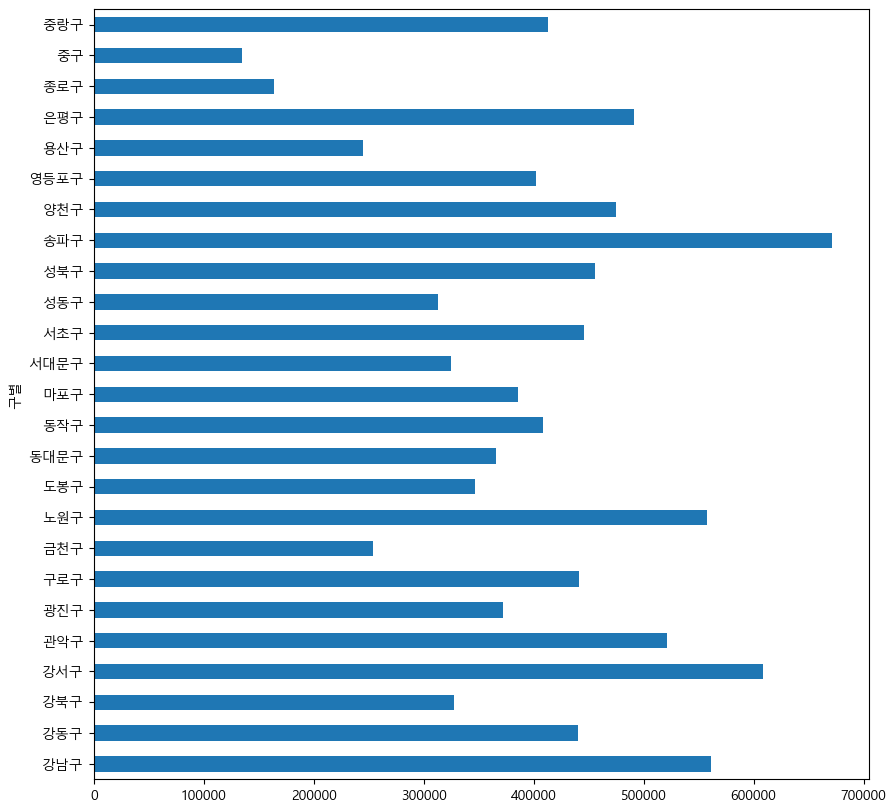

In [139]:
data_result["인구수"].plot(kind="barh", figsize=(10, 10));

---

## 5. 데이터 시각화

In [140]:
import matplotlib.pyplot as plt 
# import matplotlib as mpl 
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family="Malgun Gothic") # Windows: Malgun Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [141]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

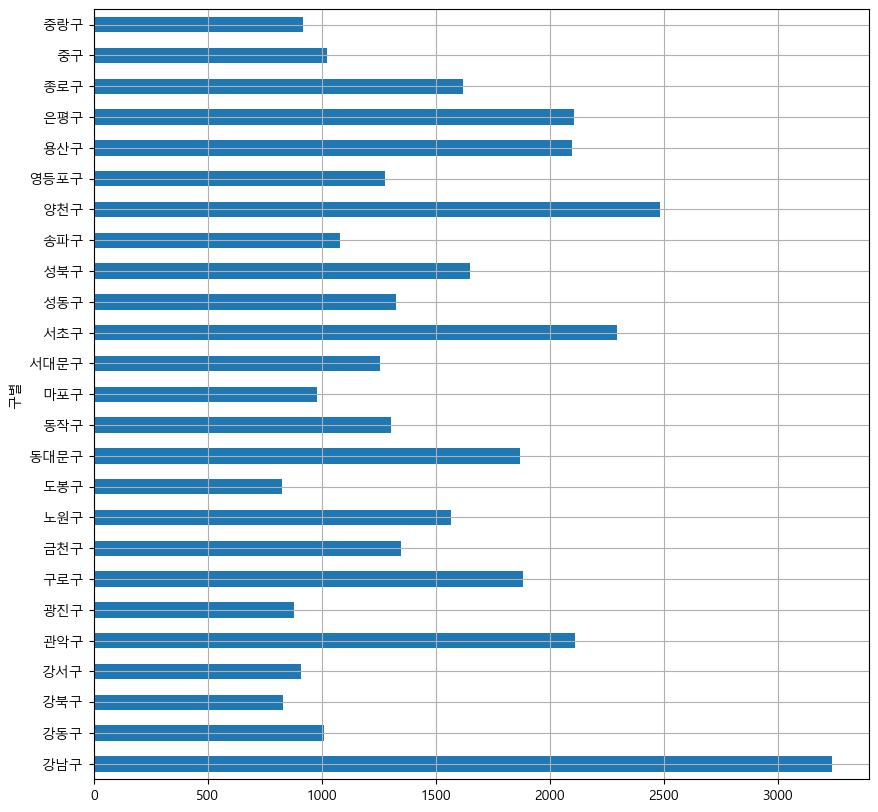

In [142]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

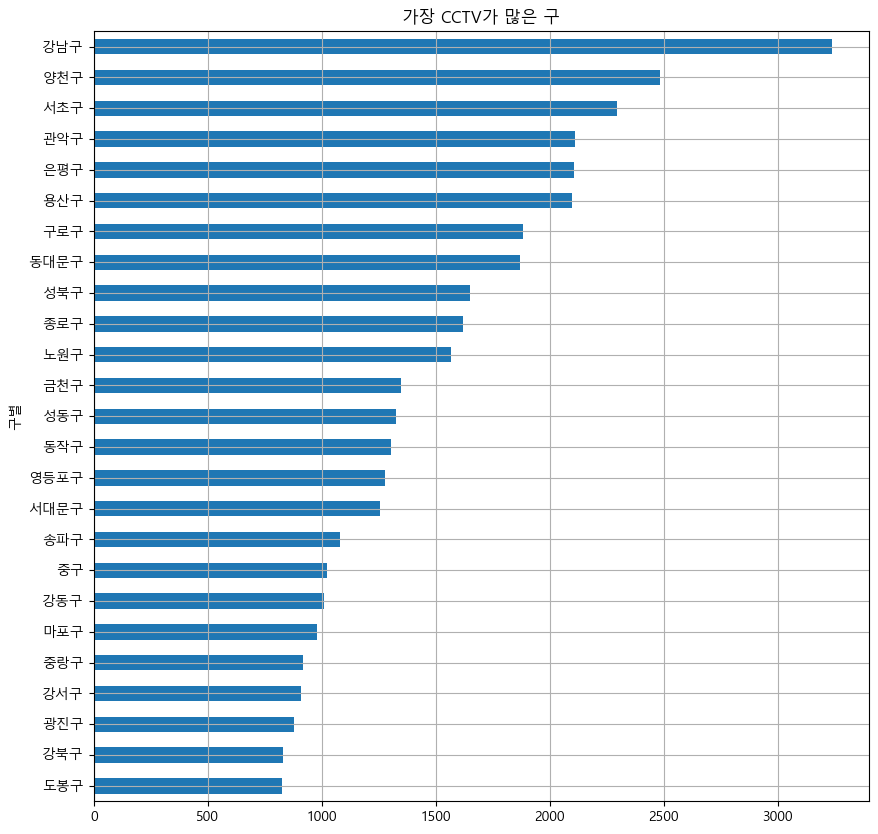

In [143]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));
drawGraph()

In [144]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### CCTV비율 컬럼 시각화

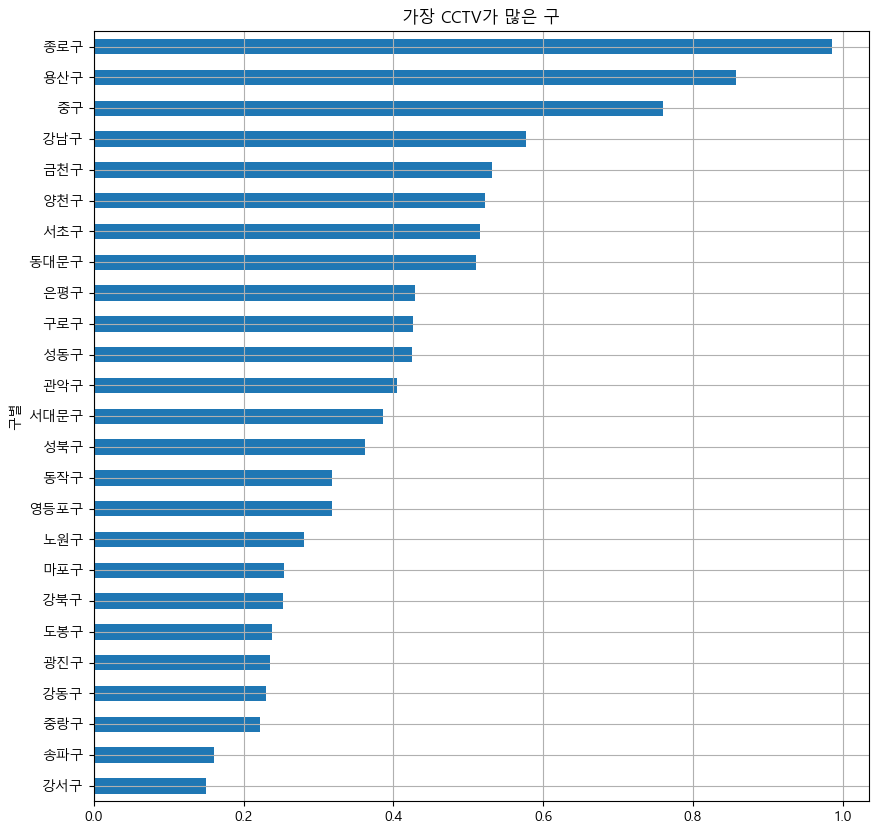

In [145]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));
drawGraph()

## 6. 데이터의 경향 표시

In [146]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

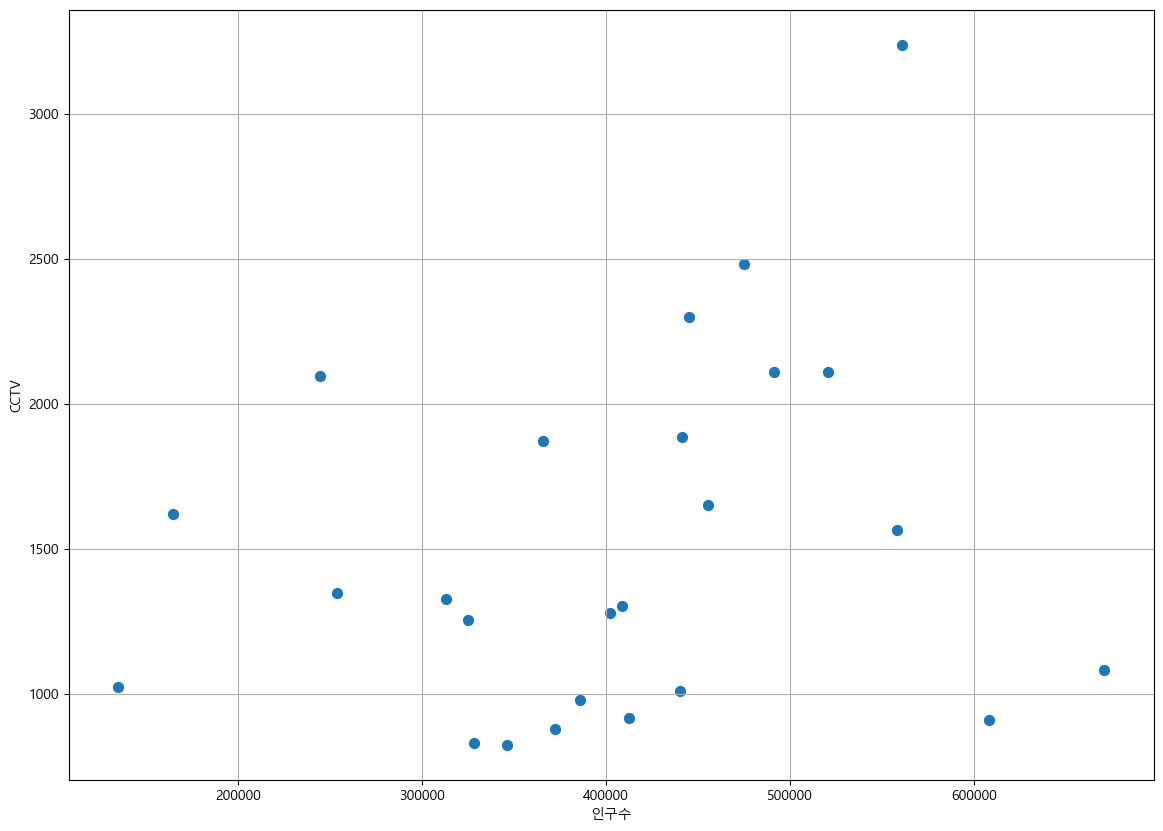

In [147]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 
drawGraph()

#### Numpy를 이용한 1차 직선 만들기 
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit 으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능 

In [148]:
import numpy as np 

In [149]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [150]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [151]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는? 

In [152]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위한 X 데이터 생성 
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성 

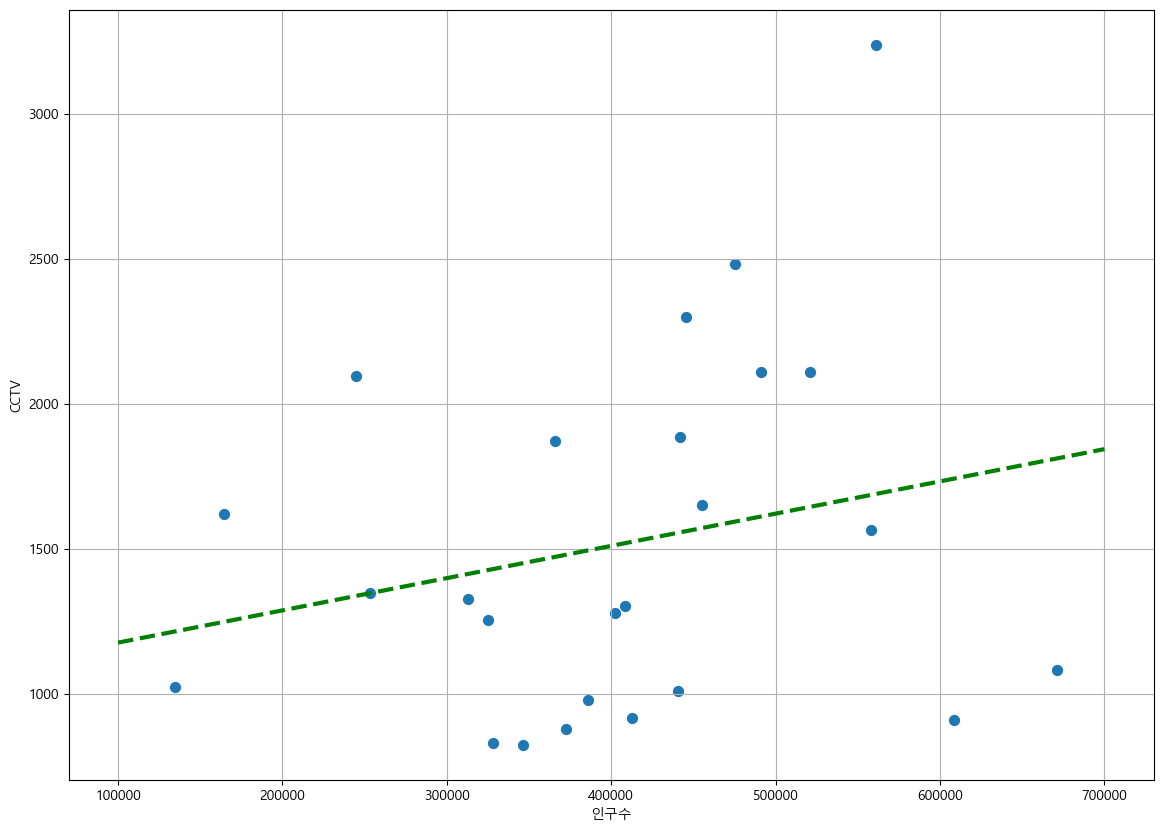

In [153]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 
drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기 
#### 경향과의 오차 만들기 
- 경향(trend)과의 오차를 만들자 
- 경향은 f1 함수에 해당 인구를 입력 
- f1(data_result["인구수"])

In [154]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1) 
f1 = np.poly1d(fp1) 
fx = np.linspace(100000, 700000, 100) 

In [155]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [156]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [157]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [158]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산 

df_sort_f = data_result.sort_values(by="오차", ascending=False) # 내림차순 
df_sort_t = data_result.sort_values(by="오차", ascending=True) # 오름차순   

In [159]:
# 경향 대비 CCTV를 많이 가진 구 
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [160]:
# 경향 대비 CCTV를 적게 가진 구 
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [161]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅 
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

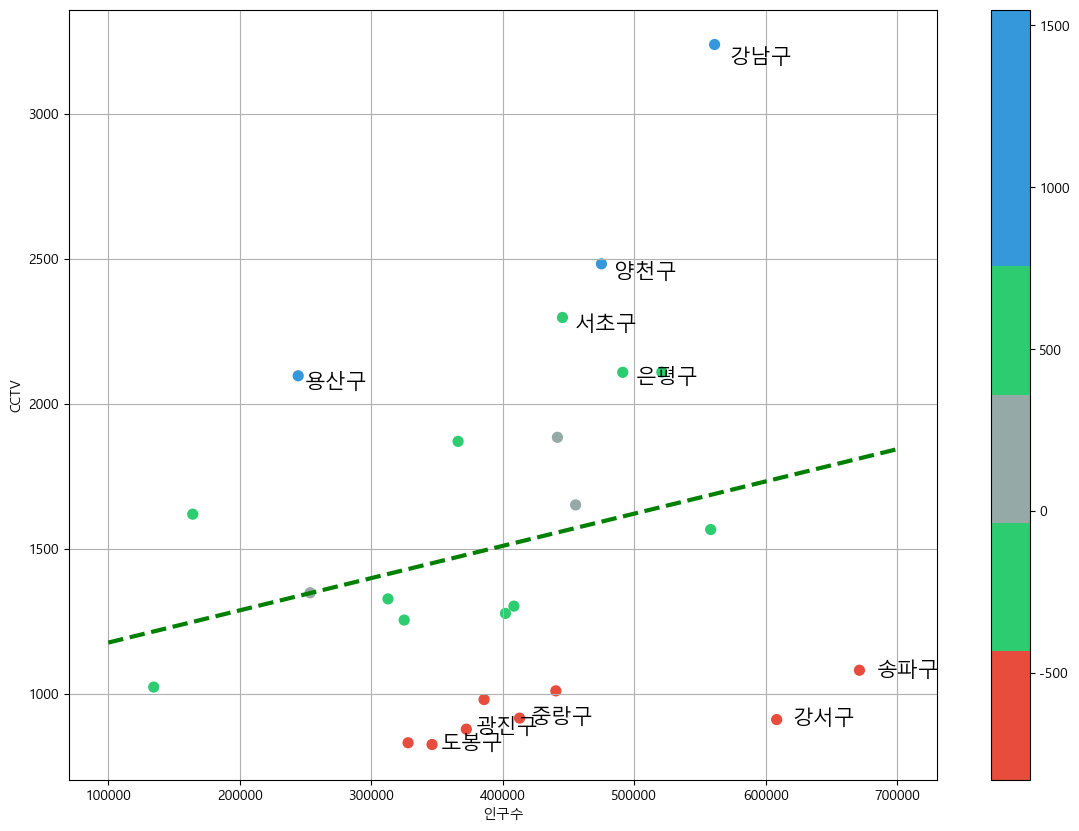

In [162]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

    for n in range(5):
        # 상위 5개 
        plt.text(
            df_sort_f["인구수"][n] * 1.02, # x 좌표
            df_sort_f["소계"][n] * 0.98,  # y 좌표
            df_sort_f.index[n], # title 
            fontsize=15,
        )
    
        # 하위 5개 
        plt.text(
            df_sort_t["인구수"][n] * 1.02, 
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15
        )
        
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show() 
drawGraph()

In [163]:
# 데이터 저장
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding='utf-8')

In [164]:
CCTV_result = pd.read_csv("../data/01. CCTV_result.csv", encoding="utf-8")
CCTV_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395
